In [1]:
import pandas as pd

# Load the dataset
file_path = "DevOps AWS Azure Effectiveness Deployment.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.head()


,Organization Name,DevOps Efficiency Score,Deployment Time (hours),Resource Usage (GB),AWS Scalability Score,Azure Reliability Score,Cost Efficiency ($),User Feedback Score,Platform Comparison Index,Cloud Integration Effectiveness,Data Security Level,Ethical Compliance,Performance Benchmarking,System Integration Metrics,Operational Flexibility
0,97.280867,27.005785,82.330643,31.176731,99.669022,9.217916,93.016676,45.753412,39.444980,69.066247,41.613356,54.586646,83.254270,61.831494,76.020245
1,50.655977,71.733429,89.419236,78.708647,86.045506,73.141908,30.376261,9.875982,72.470876,52.715741,2.248699,17.474333,86.633175,27.547236,92.945260
2,85.690327,49.673990,16.089223,92.874775,40.071560,19.208071,27.129916,71.582926,18.479459,23.188102,34.671648,92.536787,20.278424,51.455620,74.449163
3,86.962197,47.681079,74.915795,86.126322,36.647329,49.482157,20.459687,85.858965,40.984091,11.226802,82.236712,0.276373,40.798725,24.635338,92.577594
4,50.486453,84.282712,76.790907,17.610578,2.469869,15.461407,82.250081,84.470244,69.485755,37.468774,33.345480,23.768924,91.387704,22.227892,98.849562


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Organization Name                50000 non-null  float64
 1   DevOps Efficiency Score          50000 non-null  float64
 2   Deployment Time (hours)          50000 non-null  float64
 3   Resource Usage (GB)              50000 non-null  float64
 4   AWS Scalability Score            50000 non-null  float64
 5   Azure Reliability Score          50000 non-null  float64
 6   Cost Efficiency ($)              50000 non-null  float64
 7   User Feedback Score              50000 non-null  float64
 8   Platform Comparison Index        50000 non-null  float64
 9   Cloud Integration Effectiveness  50000 non-null  float64
 10  Data Security Level              50000 non-null  float64
 11  Ethical Compliance               50000 non-null  float64
 12  Performance Benchm

In [2]:
# Drop "Organization Name" as it doesn't contribute to the analysis
df.drop(columns=["Organization Name"], inplace=True)

# Check for duplicate records
duplicate_count = df.duplicated().sum()

# Standardize column names (replace spaces with underscores and convert to lowercase)
df.columns = df.columns.str.replace(" ", "_").str.lower()

# Display basic statistics to detect anomalies
summary_stats = df.describe()

# Display results
duplicate_count, summary_stats


(0,
        devops_efficiency_score  deployment_time_(hours)  resource_usage_(gb)  \
 count             50000.000000             50000.000000         50000.000000   
 mean                 50.300125                49.997575            49.894168   
 std                  28.870222                28.843931            28.859602   
 min                   0.002633                 0.000443             0.001126   
 25%                  25.269893                25.146050            24.854741   
 50%                  50.353662                49.796566            49.879530   
 75%                  75.438832                75.030567            74.894883   
 max                  99.997575                99.999730            99.999621   
 
        aws_scalability_score  azure_reliability_score  cost_efficiency_($)  \
 count           50000.000000             50000.000000         50000.000000   
 mean               49.786704                49.932753            49.840946   
 std                28.85494

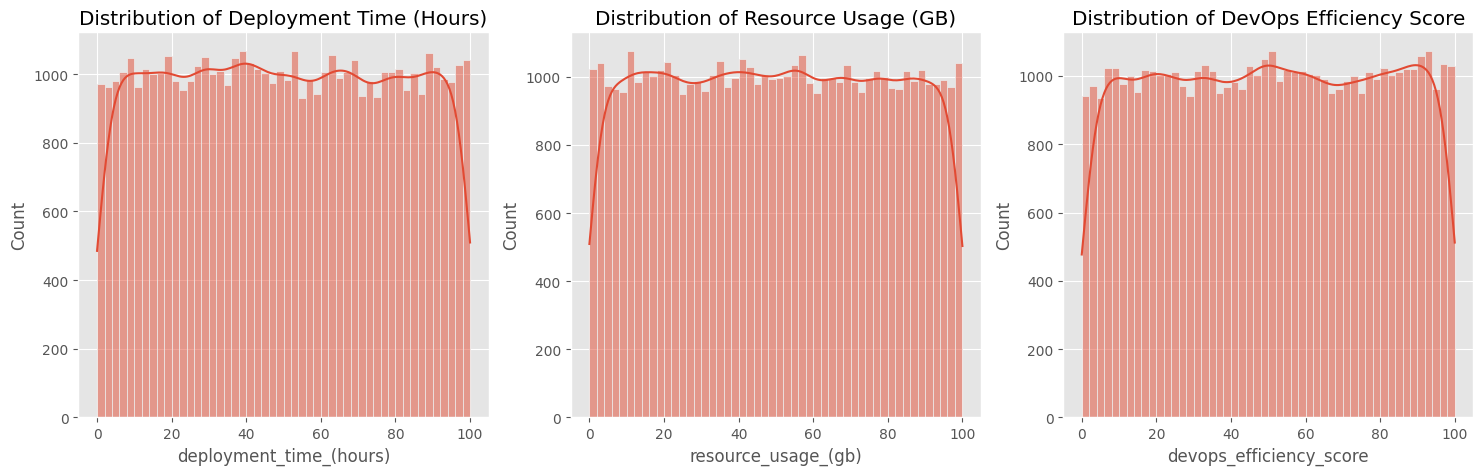

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Create subplots for key distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of Deployment Time
sns.histplot(df["deployment_time_(hours)"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Deployment Time (Hours)")

# Distribution of Resource Usage
sns.histplot(df["resource_usage_(gb)"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Resource Usage (GB)")

# Distribution of DevOps Efficiency Score
sns.histplot(df["devops_efficiency_score"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Distribution of DevOps Efficiency Score")

# Show plots
plt.show()


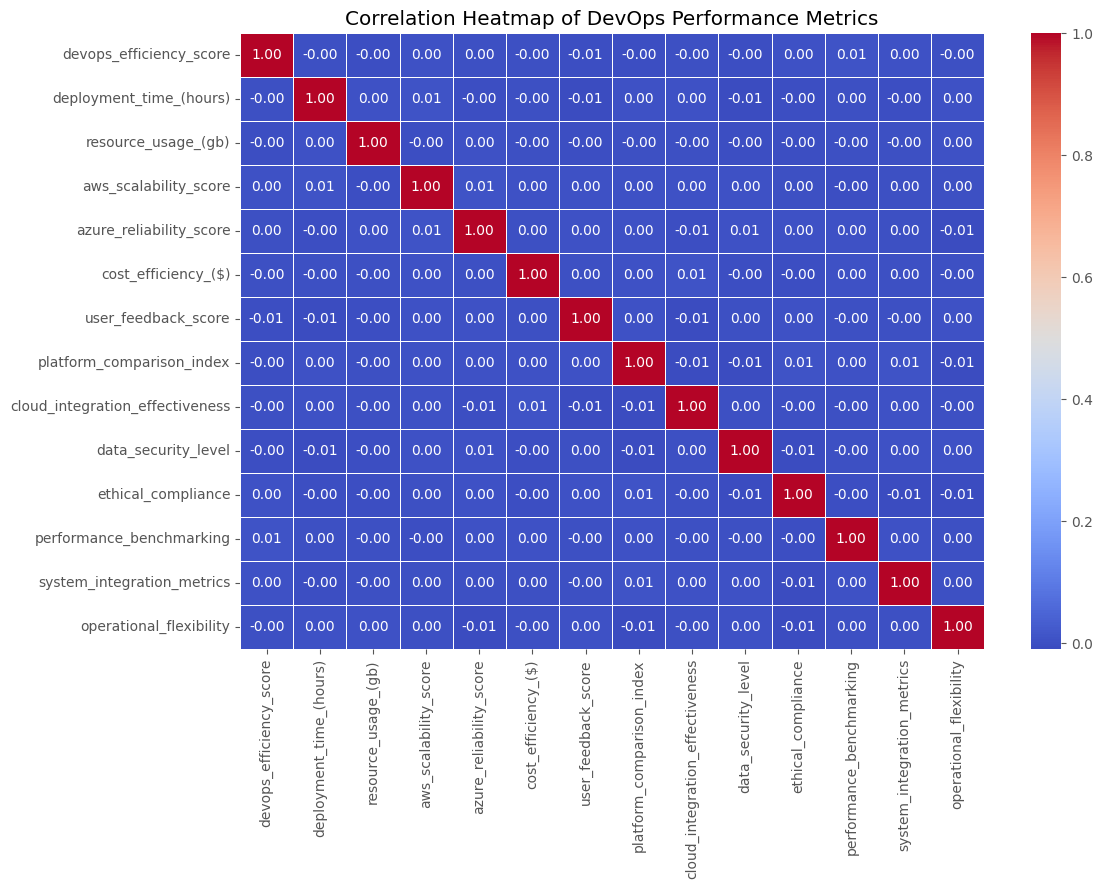

In [4]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of DevOps Performance Metrics")
plt.show()


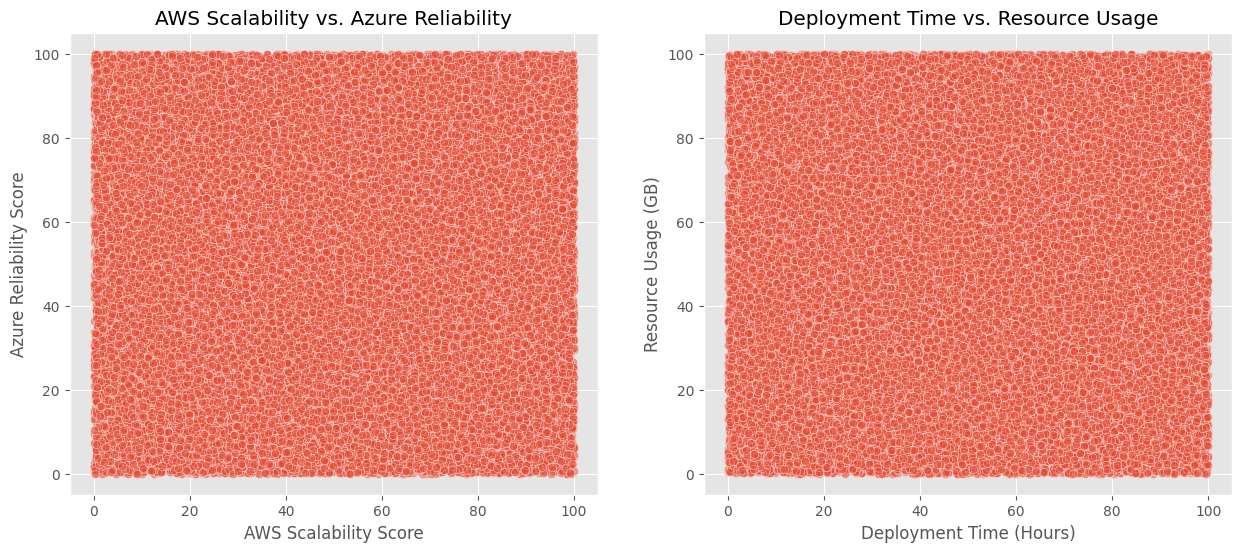

In [5]:
# Create subplots for AWS vs Azure performance comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# AWS Scalability vs. Azure Reliability
sns.scatterplot(x=df["aws_scalability_score"], y=df["azure_reliability_score"], alpha=0.5, ax=axes[0])
axes[0].set_title("AWS Scalability vs. Azure Reliability")
axes[0].set_xlabel("AWS Scalability Score")
axes[0].set_ylabel("Azure Reliability Score")

# Deployment Time vs. Resource Usage
sns.scatterplot(x=df["deployment_time_(hours)"], y=df["resource_usage_(gb)"], alpha=0.5, ax=axes[1])
axes[1].set_title("Deployment Time vs. Resource Usage")
axes[1].set_xlabel("Deployment Time (Hours)")
axes[1].set_ylabel("Resource Usage (GB)")

# Show plots
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Select features and target variable
features = ["devops_efficiency_score", "aws_scalability_score", "azure_reliability_score", "resource_usage_(gb)"]
target = "deployment_time_(hours)"

X = df[features]
y = df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R² Score
Linear Regression,24.880287,28.771544,-0.001145
Decision Tree,33.474787,40.924750,-1.025549
Random Forest,25.319897,29.505029,-0.052841
Gradient Boosting,24.858220,28.765334,-0.000713


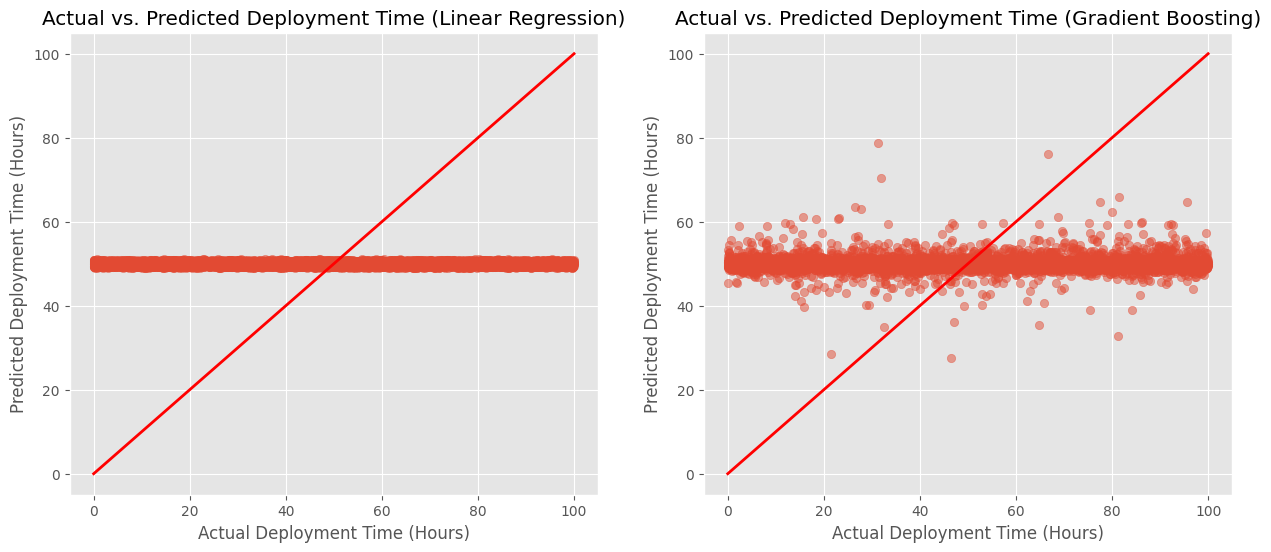

In [8]:
# Scatter plot to visualize actual vs. predicted values for the best models

# Get predictions from the best models (Gradient Boosting and Linear Regression)
best_models = {
    "Linear Regression": models["Linear Regression"].predict(X_test),
    "Gradient Boosting": models["Gradient Boosting"].predict(X_test)
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, (name, y_pred) in enumerate(best_models.items()):
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)  # Ideal fit line
    axes[idx].set_title(f"Actual vs. Predicted Deployment Time ({name})")
    axes[idx].set_xlabel("Actual Deployment Time (Hours)")
    axes[idx].set_ylabel("Predicted Deployment Time (Hours)")

# Show plots
plt.show()


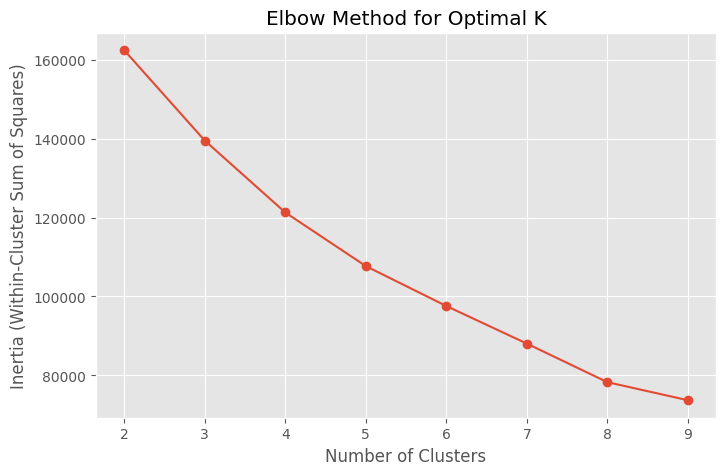

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_features = ["devops_efficiency_score", "aws_scalability_score", "azure_reliability_score", "deployment_time_(hours)"]
X_cluster = df[clustering_features]

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


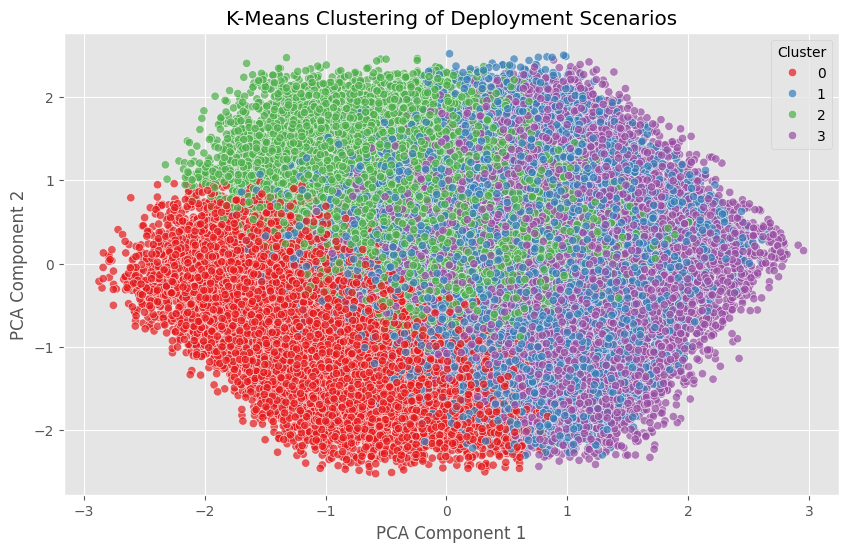

In [11]:
# Based on the elbow method, choosing k=4 for clustering
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters (using first two principal components for better plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["pca1"], y=df["pca2"], hue=df["cluster"], palette="Set1", alpha=0.7)
plt.title("K-Means Clustering of Deployment Scenarios")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [14]:
# Compute mean values of key features for each cluster
cluster_summary = df.groupby("cluster").mean()

# Display the summary table
import pandas as pd
dataframe=pd.DataFrame(cluster_summary)
dataframe

,devops_efficiency_score,deployment_time_(hours),resource_usage_(gb),aws_scalability_score,azure_reliability_score,cost_efficiency_($),user_feedback_score,platform_comparison_index,cloud_integration_effectiveness,data_security_level,ethical_compliance,performance_benchmarking,system_integration_metrics,operational_flexibility,pca1,pca2
cluster,,,,,,,,,,,,,,,,
0,52.159120,23.033262,50.003234,25.990191,50.632072,49.661743,50.039731,50.026929,49.608152,50.321220,49.816411,50.212527,49.903702,49.912402,-0.961948,-0.774120
1,22.418982,48.347714,49.889412,73.033558,50.625929,49.776583,50.391819,49.951157,49.889412,50.255005,50.127212,49.975995,50.060863,50.178544,0.439326,0.044167
2,49.098931,77.709395,49.890409,26.732963,48.369220,49.876418,49.952378,49.741972,49.802784,49.681286,49.942476,50.405051,49.717021,50.018551,-0.264434,0.728775
3,77.581018,51.401920,49.791597,73.763110,50.088830,50.052589,50.182861,50.015741,50.101520,49.946551,49.670672,50.022397,50.154904,49.979031,0.803623,0.015304


In [16]:
import warnings
warnings.filterwarnings('ignore')

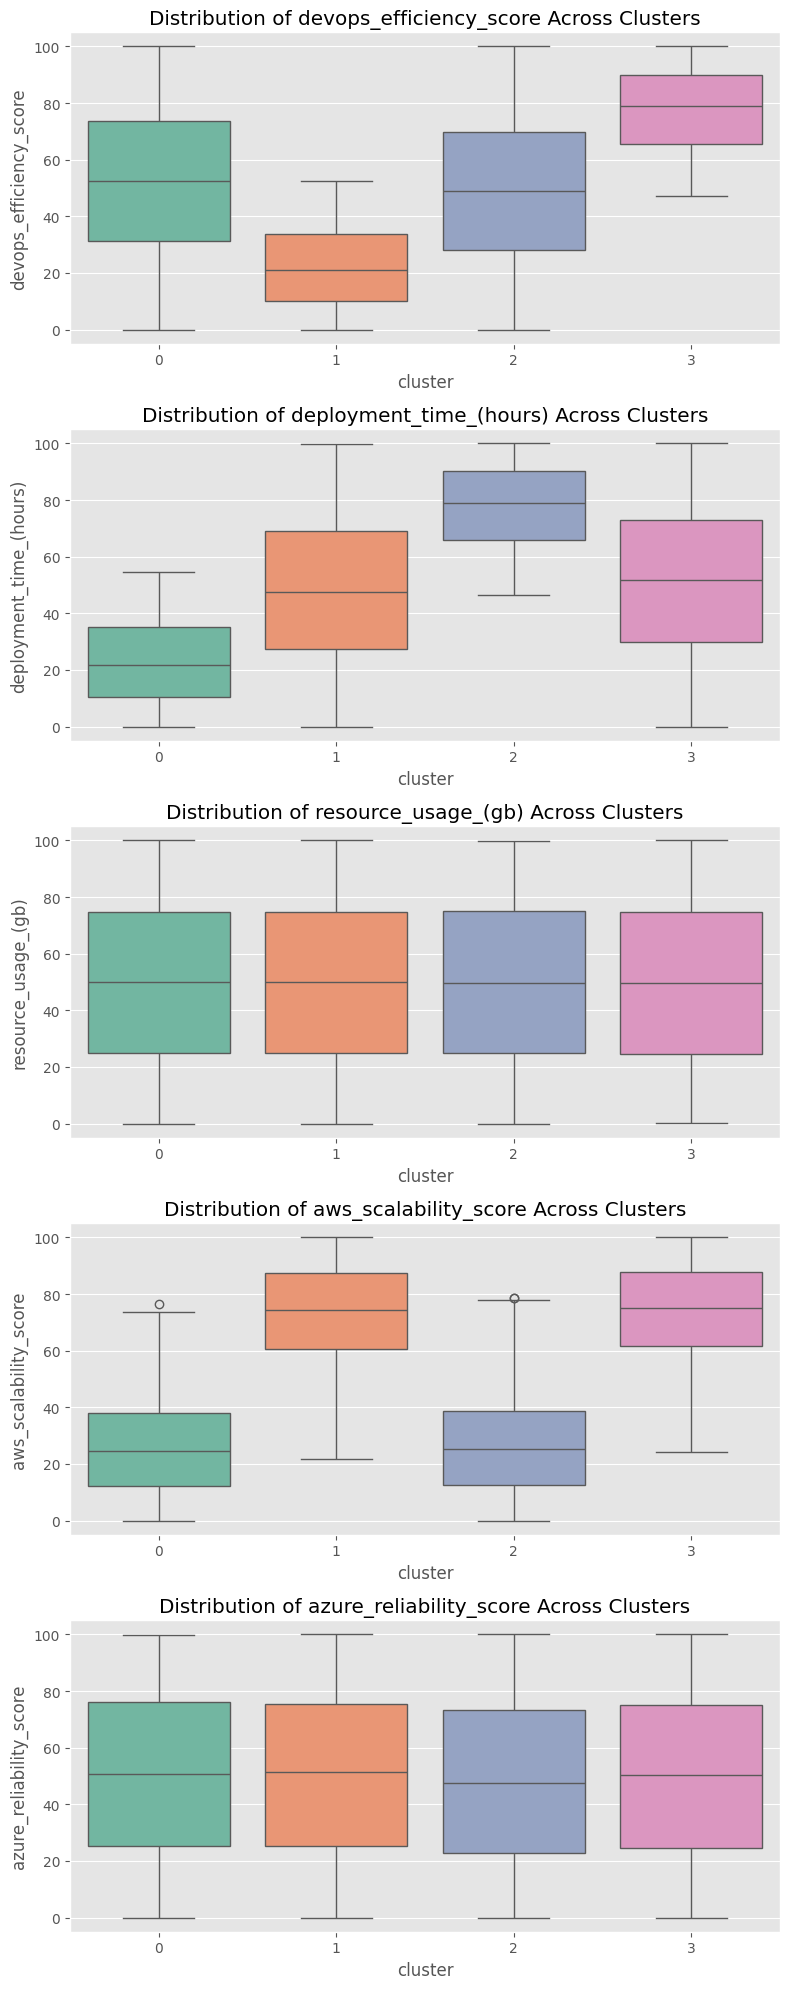

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to visualize
features_to_plot = ["devops_efficiency_score", "deployment_time_(hours)", "resource_usage_(gb)", "aws_scalability_score", "azure_reliability_score"]

# Create subplots
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(8, 20))

# Boxplot for each feature grouped by cluster
for idx, feature in enumerate(features_to_plot):
    sns.boxplot(x=df["cluster"], y=df[feature], ax=axes[idx], palette="Set2")
    axes[idx].set_title(f"Distribution of {feature} Across Clusters")

plt.tight_layout()
plt.show()


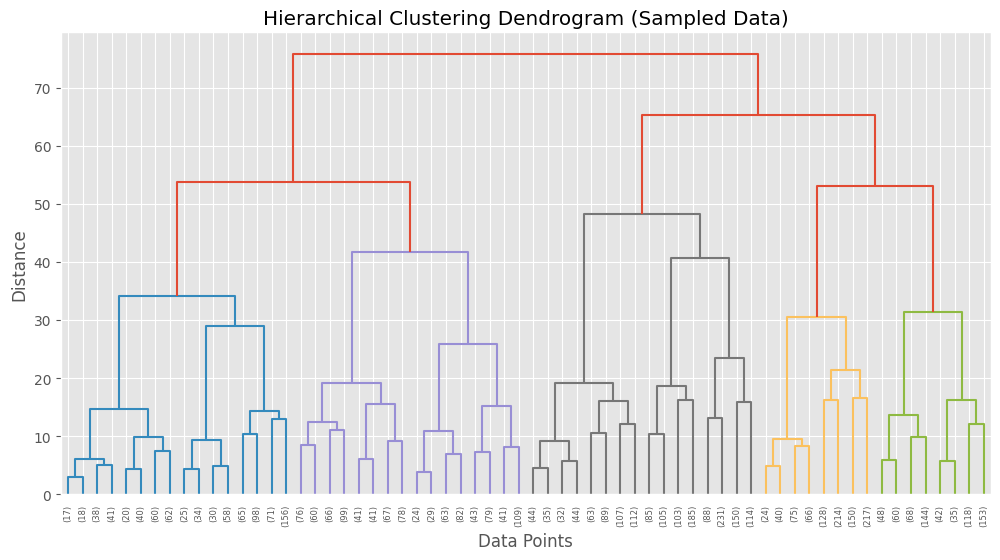

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import numpy as np

# Sample a subset of the data (e.g., 5000 random points) to reduce memory usage
sample_size = 5000
df_sample = df.sample(n=sample_size, random_state=42)
X_sample = X_scaled[df_sample.index]

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X_sample, method="ward")

# Plot dendrogram to determine the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Choose the number of clusters based on the dendrogram (e.g., 4)
df.loc[df_sample.index, "hierarchical_cluster"] = fcluster(linkage_matrix, 4, criterion="maxclust")


In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Sample a subset of the data to reduce memory usage
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)
X_sample = X_scaled[df_sample.index]

# Reduce dimensionality using PCA (keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_sample)

# Apply DBSCAN with optimized parameters
dbscan = DBSCAN(eps=0.8, min_samples=10, n_jobs=-1)  # `n_jobs=-1` uses all CPU cores
df.loc[df_sample.index, "dbscan_cluster"] = dbscan.fit_predict(X_pca)

# Check number of clusters found (-1 represents noise/outliers)
print("Unique DBSCAN Clusters:", df["dbscan_cluster"].nunique())


Unique DBSCAN Clusters: 1


In [22]:
# Compare mean values of key features across different clustering models
clustering_comparison = df.groupby(["cluster", "hierarchical_cluster", "dbscan_cluster"]).mean()

# Display results
import pandas as pd
dataframe=pd.DataFrame(clustering_comparison)
dataframe

devops_efficiency_score  \
cluster hierarchical_cluster dbscan_cluster                            
0       1.0                  0.0                           68.188284   
        2.0                  0.0                           73.554706   
        3.0                  0.0                           49.231945   
        4.0                  0.0                           28.468666   
1       1.0                  0.0                           46.768653   
        3.0                  0.0                           17.704005   
        4.0                  0.0                           23.395360   
2       1.0                  0.0                           58.090493   
        2.0                  0.0                           79.123487   
        3.0                  0.0                           41.460260   
        4.0                  0.0                           34.894067   
3       1.0                  0.0                           78.941901   
        2.0                  0.0                           86.279434   
        3.0                  0.0                           76.842304   
        4.0                  0.0                           59.359551   

                                             deployment_time_(hours)  \
cluster hierarchical_cluster dbscan_cluster                            
0       1.0                  0.0                           17.352275   
        2.0                  0.0                           21.791207   
        3.0                  0.0                           39.414848   
        4.0                  0.0                           20.129878   
1       1.0                  0.0                           34.283805   
        3.0                  0.0                           65.179312   
        4.0                  0.0                           41.662917   
2       1.0                  0.0                           84.596123   
        2.0                  0.0                           77.330565   
        3.0                  0.0                           77.888508   
        4.0                  0.0                           74.427631   
3       1.0                  0.0                           45.109819   
        2.0                  0.0                           59.602187   
        3.0                  0.0                           72.168027   
        4.0                  0.0                           47.779331   

                                             resource_usage_(gb)  \
cluster hierarchical_cluster dbscan_cluster                        
0       1.0                  0.0                       48.345714   
        2.0                  0.0                       49.837595   
        3.0                  0.0                       47.126395   
        4.0                  0.0                       49.598834   
1       1.0                  0.0                       47.159279   
        3.0                  0.0                       49.545744   
        4.0                  0.0                       51.581216   
2       1.0                  0.0                       52.688668   
        2.0                  0.0                       50.422166   
        3.0                  0.0                       49.206208   
        4.0                  0.0                       43.984547   
3       1.0                  0.0                       49.874145   
        2.0                  0.0                       48.619909   
        3.0                  0.0                       50.291085   
        4.0                  0.0                       51.155553   

                                             aws_scalability_score  \
cluster hierarchical_cluster dbscan_cluster                          
0       1.0                  0.0                         46.898968   
        2.0                  0.0                         21.116194   
        3.0                  0.0                         17.698050   
        4.0                  0.0                         29.212023   
1       1.0       